## Model training and testing

In [4]:
import joblib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from model_training import train_model
from model_training import load_data
from model_training import merge_data


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.30 15:57:00      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
# Train on generated data
set_name = 'training_set_207'
TRAIN_MODEL = True

if TRAIN_MODEL == True:
    train_model(set_name, MERGE=False)

Training: R2 = 0.28853293413996656, MAE = 1.4667805105408887e-05
Test: R2 = -0.11377542538772611, MAE = 2.9718108836631113e-05


In [2]:
estimator = joblib.load('estimator.pkl')

NameError: name 'joblib' is not defined

In [4]:
#input_data, output_data = merge_data("data")
input_data, output_data = load_data("training_set_207")
#"32 608 608 2 2"
print(input_data.shape) # [N_SAMPLE][OPTIC_FUNCT]
print(output_data.shape) # [N_SAMPLE][MAGNET ERROR]
#triplet_errors, arc_errors_b1, arc_errors_b2, mqt_errors_b1, mqt_errors_b2

(594, 3341)
(594, 1248)


In [5]:
def obtain_errors(input_data, output_data):
    
    pred_triplet = np.hstack(estimator.predict(input_data)[:,:32])
    true_triplet = np.hstack(output_data[:,:32])

    pred_arc = np.hstack(estimator.predict(input_data)[:,32:1248])
    true_arc = np.hstack(output_data[:,32:1248])

    pred_mqt = np.hstack(estimator.predict(input_data)[:,-4:])
    true_mqt = np.hstack(output_data[:,-4:])

    return pred_triplet, true_triplet, pred_arc, true_arc, pred_mqt, true_mqt

In [6]:
pred_triplet, true_triplet, pred_arc, true_arc, pred_mqt, true_mqt = obtain_errors(input_data, output_data)

#pred_q1, true_q1 = 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    2.0s remaining:    4.7s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    2.3s remaining:    1.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished


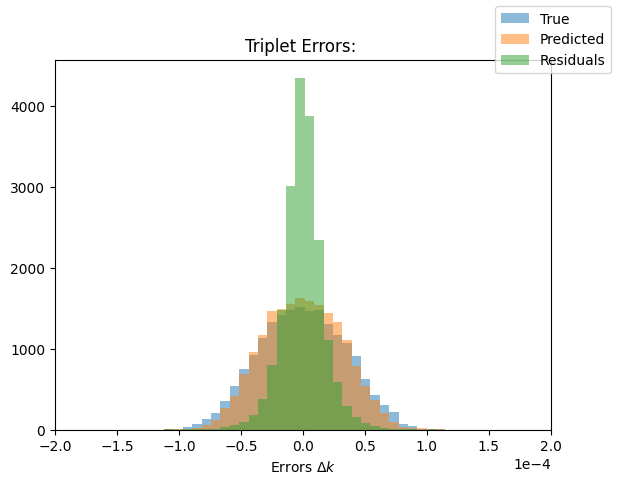

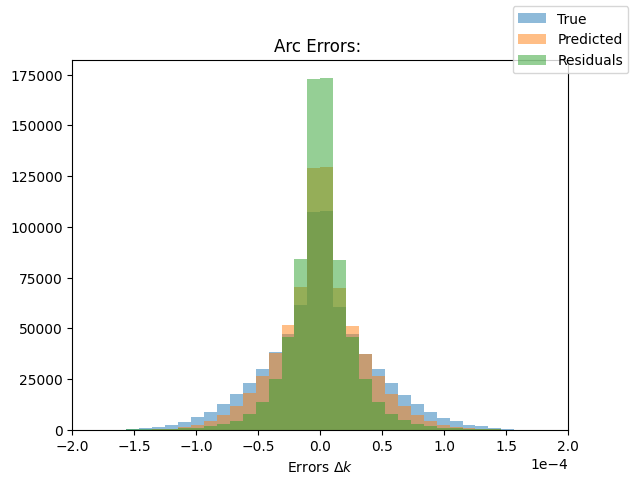

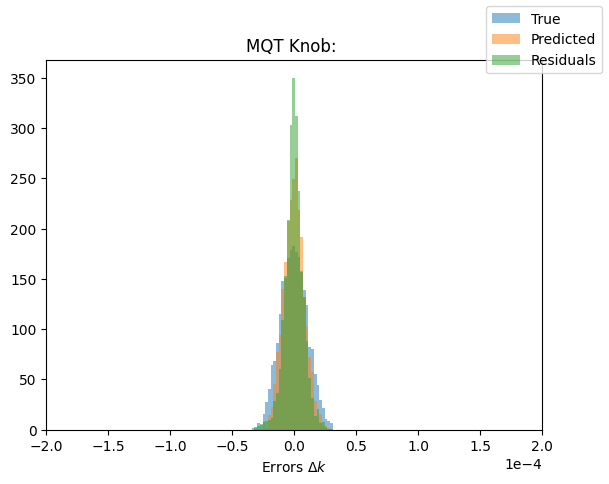

In [7]:
#Example histogram for the triplet errors
errors = (("Triplet Errors: " ,pred_triplet, true_triplet), 
 ("Arc Errors: ", pred_arc, true_arc), 
 ("MQT Knob: ", pred_mqt, true_mqt))

#fig, axs = plt.subplots(3, figsize=(10,15))

for idx, (name, pred_error, true_error) in enumerate(errors):
    #ax = axs[idx]
    fig, ax = plt.subplots()
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    _, bins, _ = ax.hist(true_error, bins=30, alpha = 0.5,label="True")
    ax.hist(pred_error, bins=bins, alpha = 0.5, label="Predicted")
    ax.hist(pred_error-true_error, bins=bins, alpha=0.5, label="Residuals")
    ax.set_xlim(-0.0002, 0.0002)
    ax.set_title(f"{name}")
    ax.set_xlabel(r"Errors $\Delta k$")
    fig.legend()
    fig.show()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   16.3s remaining:   37.9s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   19.0s remaining:    8.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   20.1s finished


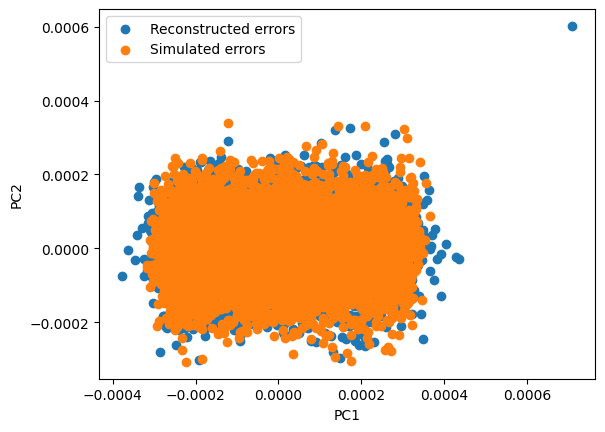

In [ ]:
#PCA visualization of the simulated magnet errors and reconstruction, 
# for an unbiased regression a similar distribution is expected, for an 
# accurate regression the spread should be similar 

pca = sklearn.decomposition.PCA(n_components=2)
 
pred_data = estimator.predict(input_data)

pca.fit(output_data) # Fitting PCA decomposition to extract the most important components of the simulation data

pred_red_data = pca.transform(pred_data)
output_red_data = pca.transform(output_data)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pred_red_data[:,0], pred_red_data[:,1], label="Reconstructed errors")
plt.scatter(output_red_data[:,0], output_red_data[:,1], label="Simulated errors")
plt.legend()

In [2]:
from madx_jobs import madx_ml_op
import matplotlib.pyplot as plt


In [3]:
mdx = madx_ml_op()
mdx.job_nominal2023()
nominal_twiss_b2 = mdx.table.twiss.dframe()
mdx.quit()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.29 15:35:32      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqx

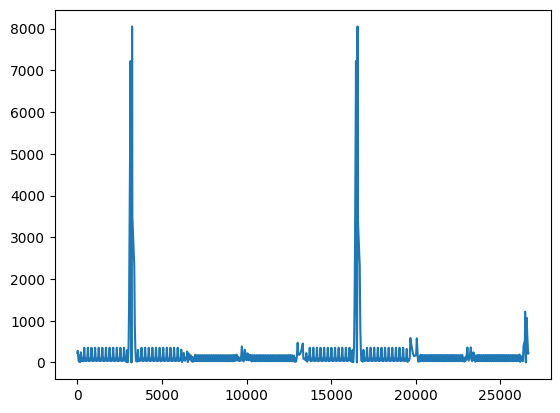

In [4]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)

In [5]:
mdx = madx_ml_op()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.29 15:35:53      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [6]:
OPTICS_30CM_2023 = '/afs/cern.ch/user/a/aborjess/work/private/models/LHCB1/B1_30cm_flat/modifiers.madx'
index = 0
seed = 1000000

mdx.job_magneterrors_b1(OPTICS_30CM_2023, str(index), seed)
b1_tw_before_match = mdx.table.twiss.dframe() # Twiss before match
mdx.match_tunes_b1()

b1_tw_after_match = mdx.table.twiss.dframe()# Twiss after match
mdx.generate_twiss_train_b1()

twiss_data_b1 = mdx.table.twiss.dframe() # Relevant to training Twiss data
common_errors = mdx.table.cetab.dframe() # Errors for both beams, triplet errors
b1_errors = mdx.table.etabb1.dframe() # Table error for MQX magnets

mdx.job_magneterrors_b2(OPTICS_30CM_2023, str(index), seed)

b2_tw_before_match = mdx.table.twiss.dframe() # Twiss before match

mdx.match_tunes_b2()

b2_tw_after_match = mdx.table.twiss.dframe()# Twiss after match

mdx.generate_twiss_train_b2()

twiss_data_b2 = mdx.table.twiss.dframe() # Relevant to training Twiss data
b2_errors= mdx.table.etabb2.dframe() # Table error for MQX magnets    

++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warnin

In [8]:
print(len([*list(common_errors.name), *list(b1_errors.name), *list(b1_errors.name)]))

1632


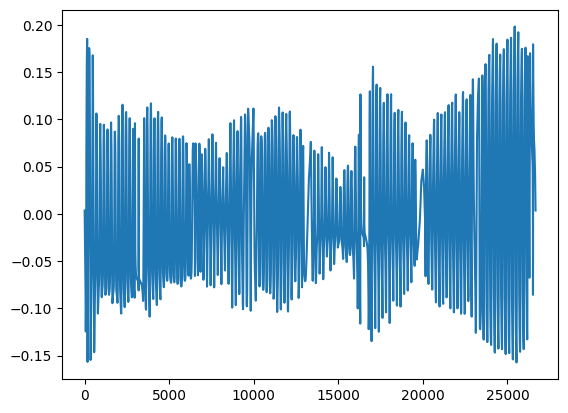

In [15]:
plt.plot(b2_tw_before_match.s, (b2_tw_before_match.betx-nominal_twiss_b2.betx)/nominal_twiss_b2.betx)

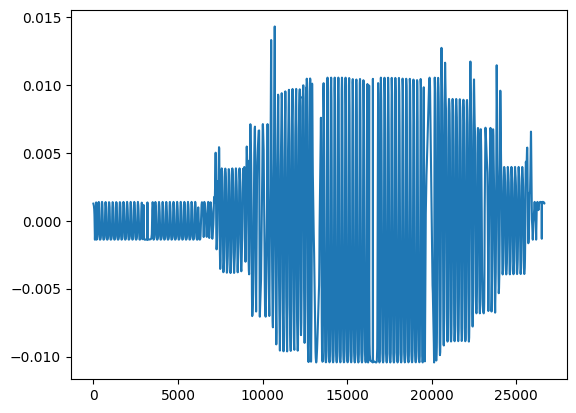

In [23]:
plt.plot(b2_tw_before_match.s, (b2_tw_after_match.betx-b2_tw_before_match.betx)/b2_tw_before_match.betx)

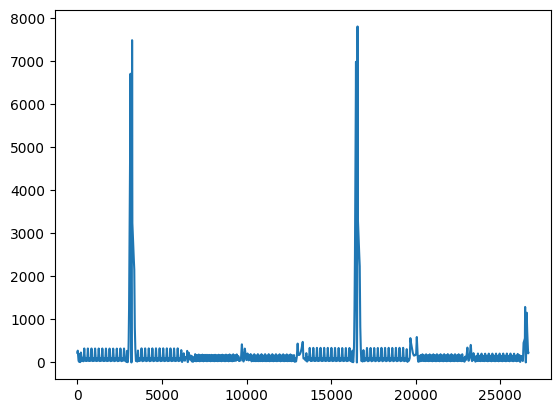

In [24]:
plt.plot(b2_tw_after_match.s, b2_tw_after_match.betx)

In [40]:
b1_errors = b1_errors.set_index("name", drop=False) 
common_errors = common_errors.set_index("name", drop=False) 
print(common_errors.k1l)

name
mqxa.3l2:1    -0.000032
mqxb.b2l2:1    0.000025
mqxb.a2l2:1    0.000022
mqxa.1l2:1    -0.000032
mqxa.1r2:1     0.000046
mqxb.a2r2:1   -0.000019
mqxb.b2r2:1   -0.000065
mqxa.3r2:1     0.000065
mqxa.3l5:1     0.000010
mqxb.b2l5:1   -0.000034
mqxb.a2l5:1   -0.000030
mqxa.1l5:1     0.000043
mqxa.1r5:1    -0.000033
mqxb.a2r5:1    0.000028
mqxb.b2r5:1    0.000040
mqxa.3r5:1    -0.000056
mqxa.3l8:1    -0.000044
mqxb.b2l8:1    0.000022
mqxb.a2l8:1    0.000050
mqxa.1l8:1    -0.000102
mqxa.1r8:1     0.000040
mqxb.a2r8:1   -0.000033
mqxb.b2r8:1   -0.000055
mqxa.3r8:1     0.000029
mqxa.3l1:1     0.000053
mqxb.b2l1:1   -0.000039
mqxb.a2l1:1   -0.000039
mqxa.1l1:1     0.000033
mqxa.1r1:1    -0.000033
mqxb.a2r1:1    0.000057
mqxb.b2r1:1    0.000045
mqxa.3r1:1    -0.000050
Name: k1l, dtype: float64


In [46]:
print(list(b1_errors.name))

['mqy.b5l2.b1:1', 'mqy.a5l2.b1:1', 'mqy.b4l2.b1:1', 'mqy.a4l2.b1:1', 'mqxa.3l2:1', 'mqxb.b2l2:1', 'mqxb.a2l2:1', 'mqxa.1l2:1', 'mqxa.1r2:1', 'mqxb.a2r2:1', 'mqxb.b2r2:1', 'mqxa.3r2:1', 'mqy.a4r2.b1:1', 'mqy.b4r2.b1:1', 'mqm.a5r2.b1:1', 'mqm.b5r2.b1:1', 'mqml.6r2.b1:1', 'mqm.6r2.b1:1', 'mqm.a7r2.b1:1', 'mqm.b7r2.b1:1', 'mqml.8r2.b1:1', 'mqmc.9r2.b1:1', 'mqm.9r2.b1:1', 'mqml.10r2.b1:1', 'mq.11r2.b1:1', 'mqtli.11r2.b1:1', 'mqt.12r2.b1:1', 'mq.12r2.b1:1', 'mqt.13r2.b1:1', 'mq.13r2.b1:1', 'mqt.14r2.b1:1', 'mq.14r2.b1:1', 'mqt.15r2.b1:1', 'mq.15r2.b1:1', 'mqt.16r2.b1:1', 'mq.16r2.b1:1', 'mqt.17r2.b1:1', 'mq.17r2.b1:1', 'mqt.18r2.b1:1', 'mq.18r2.b1:1', 'mqt.19r2.b1:1', 'mq.19r2.b1:1', 'mqt.20r2.b1:1', 'mq.20r2.b1:1', 'mqt.21r2.b1:1', 'mq.21r2.b1:1', 'mq.22r2.b1:1', 'mq.23r2.b1:1', 'mq.24r2.b1:1', 'mq.25r2.b1:1', 'mq.26r2.b1:1', 'mq.27r2.b1:1', 'mq.28r2.b1:1', 'mq.29r2.b1:1', 'mq.30r2.b1:1', 'mq.31r2.b1:1', 'mq.32r2.b1:1', 'mq.33r2.b1:1', 'mq.34r2.b1:1', 'mq.33l3.b1:1', 'mq.32l3.b1:1', 'mq.31l

(array([  4.,  10.,  31.,  70., 114., 407.,  95.,  37.,  20.,  12.]),
 array([-1.47268554e-04, -1.19435126e-04, -9.16016979e-05, -6.37682697e-05,
        -3.59348416e-05, -8.10141344e-06,  1.97320147e-05,  4.75654428e-05,
         7.53988710e-05,  1.03232299e-04,  1.31065727e-04]),
 <BarContainer object of 10 artists>)

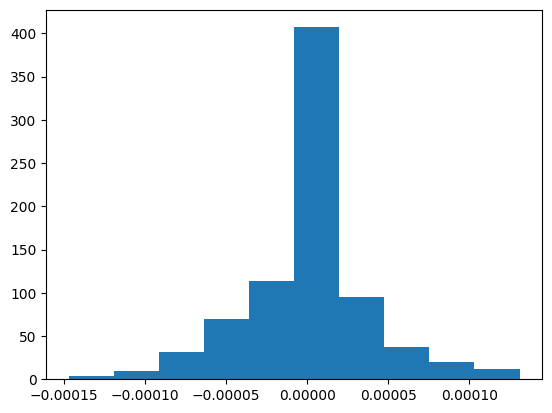

In [43]:
plt.hist(b1_errors.k1l)

(array([1., 0., 3., 4., 8., 0., 1., 5., 6., 4.]),
 array([-1.02048103e-04, -8.52959564e-05, -6.85438099e-05, -5.17916634e-05,
        -3.50395170e-05, -1.82873705e-05, -1.53522400e-06,  1.52169225e-05,
         3.19690690e-05,  4.87212154e-05,  6.54733619e-05]),
 <BarContainer object of 10 artists>)

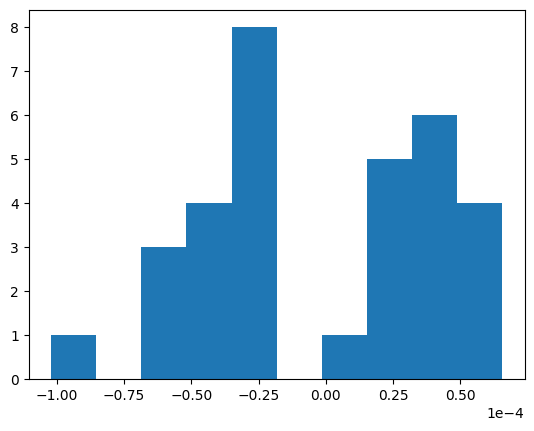

In [35]:
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.hist(np.array(common_errors.k1l))

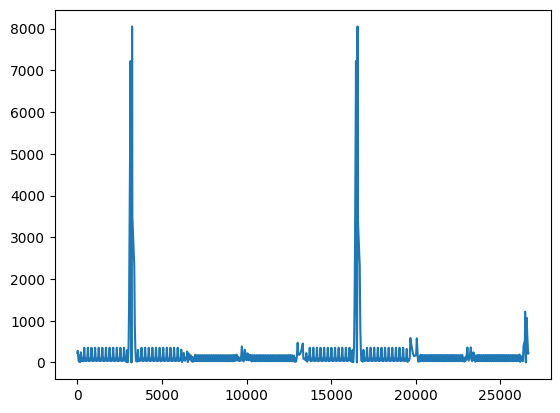

In [25]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)